In [1]:
!pip install -U nltk

     |████████████████████████████████| 1.5MB 4.3MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
!pip install selenium

     |████████████████████████████████| 911kB 4.1MB/s 


In [3]:
pip install nltk

In [5]:
import lxml
import requests
import nltk
nltk.download("stopwords")
from bs4 import BeautifulSoup
from string import punctuation
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
from nltk.stem.snowball import SnowballStemmer ## долго

In [7]:
from pymystem3 import Mystem # pip install pymystem3, ## долго

In [8]:
from nltk.stem import WordNetLemmatizer # https://en.wikipedia.org/wiki/WordNet

'https://www.rbc.ru/search/?query=РБК&material=short_news&dateFrom=20.04.2021&dateTo=20.05.2021'

In [10]:
material = 'article'
period = ['11.05.2021', '20.05.2021']
#i = 1

url = 'https://www.rbc.ru/search/?query=РБК&material=' + material + '&dateFrom=' + period[0] + '&dateTo='+ period[1]
#news_df = pd.DataFrame(columns=['rubric', 'date', 'url', 'link', 'title', 'text'])
#news_df

In [15]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')
links = soup.find_all('a', class_= 'search-item__link')
link_overview = soup.find_all('span', class_= 'search-item__text')

link_overview

[<span class="search-item__text">
                                  ...  находится в департаменте финансовых расследований Комитета государственного контроля (ДФР КГК). <b>РБК</b> обратился за комментарием в ДФР КГК. Чернявская перестала выходить на ...  сейчас ее сопровождает в больнице правоохранитель, неизвестно», — говорилось в публикации. [ <b>РБК</b> ] Против сотрудников Tut.by завели дело об уклонении от уплаты ... 
                             </span>, <span class="search-item__text">
                                  ...  не будет, никаких нарушений действующего законодательства это предложение не предполагает». [ <b>РБК</b> ] Юристы оценили идею ФСИН заменить трудовых мигрантов заключенными Почему непросто ...  Конституция и ратифицированные Россией международные конвенции, напомнил в разговоре с <b>РБК</b> руководитель правового департамента Конфедерации труда России Олег Бабич. Принудительный труд ... 
                             </span>, <span class="search-item__text">
 

In [22]:
import re

In [23]:
rbc = str()

for link in links:
    resp = requests.get(link['href'])
    
    soup_link = BeautifulSoup(resp.text, 'lxml')

    link_overview = soup_link.find_all('span', class_= 'article__text')
    
    link_text = soup_link.find_all('p')
    
    rbc += re.sub(r'<.+?>', '', str(link_overview + link_text))

rbc

'[Юлия Чернявская, вдова основателя белорусского портала Tut.by Юрия Зиссера, находится под домашним арестом. Об этом сообщается в Telegram-канале портала., «У вдовы Юрия Зиссера Юлии Чернявской все в порядке, она благодарит за поддержку и передает привет. Она находится дома под домашним арестом. К ней относятся уважительно и корректно. Адвокат Юлии\xa0— под подпиской о неразглашении»,\xa0— говорится в сообщении., Ранее 20 мая правозащитники из центра «Весна» сообщали, что Чернявская находится в департаменте финансовых расследований Комитета государственного контроля (ДФР КГК)., РБК обратился за комментарием в ДФР КГК., Чернявская перестала выходить на связь с близкими 18 мая. В тот день Комитет государственного контроля (КГК) Белоруссии заявил, что против сотрудников Tut.by завели уголовное дело по статье об уклонении от уплаты налогов в особо крупном размере. В офисах, региональных отделениях и у сотрудников издания прошли обыски., \n, Тем\xa0же утром сайт издания стал недоступен. Ми

In [24]:
type(rbc)

str

In [25]:
paragraphs = [sen for sen in rbc.split('\n') if sen]  # разбиваем на параграфы
paragraphs[:5]

['[Юлия Чернявская, вдова основателя белорусского портала Tut.by Юрия Зиссера, находится под домашним арестом. Об этом сообщается в Telegram-канале портала., «У вдовы Юрия Зиссера Юлии Чернявской все в порядке, она благодарит за поддержку и передает привет. Она находится дома под домашним арестом. К ней относятся уважительно и корректно. Адвокат Юлии\xa0— под подпиской о неразглашении»,\xa0— говорится в сообщении., Ранее 20 мая правозащитники из центра «Весна» сообщали, что Чернявская находится в департаменте финансовых расследований Комитета государственного контроля (ДФР КГК)., РБК обратился за комментарием в ДФР КГК., Чернявская перестала выходить на связь с близкими 18 мая. В тот день Комитет государственного контроля (КГК) Белоруссии заявил, что против сотрудников Tut.by завели уголовное дело по статье об уклонении от уплаты налогов в особо крупном размере. В офисах, региональных отделениях и у сотрудников издания прошли обыски., ',
 ', Тем\xa0же утром сайт издания стал недоступен

In [26]:
len(paragraphs) # количество параграфов

41

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
nltk.sent_tokenize(paragraphs[5]) # умное разбиение на предложения

['-->']

In [29]:
sentences = [nltk.sent_tokenize(paragraph) for paragraph in paragraphs] # токенизация по предложениям
sentences = [sen for sublist in sentences for sen in sublist]
sentences[:10]

['[Юлия Чернявская, вдова основателя белорусского портала Tut.by Юрия Зиссера, находится под домашним арестом.',
 'Об этом сообщается в Telegram-канале портала., «У вдовы Юрия Зиссера Юлии Чернявской все в порядке, она благодарит за поддержку и передает привет.',
 'Она находится дома под домашним арестом.',
 'К ней относятся уважительно и корректно.',
 'Адвокат Юлии\xa0— под подпиской о неразглашении»,\xa0— говорится в сообщении., Ранее 20 мая правозащитники из центра «Весна» сообщали, что Чернявская находится в департаменте финансовых расследований Комитета государственного контроля (ДФР КГК)., РБК обратился за комментарием в ДФР КГК., Чернявская перестала выходить на связь с близкими 18 мая.',
 'В тот день Комитет государственного контроля (КГК) Белоруссии заявил, что против сотрудников Tut.by завели уголовное дело по статье об уклонении от уплаты налогов в особо крупном размере.',
 'В офисах, региональных отделениях и у сотрудников издания прошли обыски.,',
 ', Тем\xa0же утром сайт 

In [30]:
len(sentences) # всего предложений

386

In [37]:
tokens_sentences = [nltk.word_tokenize(sentence) for sentence in sentences] # токенизация по словам

print(tokens_sentences[:10])

[['[', 'Юлия', 'Чернявская', ',', 'вдова', 'основателя', 'белорусского', 'портала', 'Tut.by', 'Юрия', 'Зиссера', ',', 'находится', 'под', 'домашним', 'арестом', '.'], ['Об', 'этом', 'сообщается', 'в', 'Telegram-канале', 'портала.', ',', '«', 'У', 'вдовы', 'Юрия', 'Зиссера', 'Юлии', 'Чернявской', 'все', 'в', 'порядке', ',', 'она', 'благодарит', 'за', 'поддержку', 'и', 'передает', 'привет', '.'], ['Она', 'находится', 'дома', 'под', 'домашним', 'арестом', '.'], ['К', 'ней', 'относятся', 'уважительно', 'и', 'корректно', '.'], ['Адвокат', 'Юлии', '—', 'под', 'подпиской', 'о', 'неразглашении', '»', ',', '—', 'говорится', 'в', 'сообщении.', ',', 'Ранее', '20', 'мая', 'правозащитники', 'из', 'центра', '«', 'Весна', '»', 'сообщали', ',', 'что', 'Чернявская', 'находится', 'в', 'департаменте', 'финансовых', 'расследований', 'Комитета', 'государственного', 'контроля', '(', 'ДФР', 'КГК', ')', '.', ',', 'РБК', 'обратился', 'за', 'комментарием', 'в', 'ДФР', 'КГК.', ',', 'Чернявская', 'перестала', 'вы

In [38]:
tokens_sentences[2] # пример токенизированного предложения

['Она', 'находится', 'дома', 'под', 'домашним', 'арестом', '.']

In [39]:
# приведение к нижнему регистру

tokens_sentences = [[token.lower() for token in token_sentence] for token_sentence in tokens_sentences]

print(tokens_sentences[:10])

[['[', 'юлия', 'чернявская', ',', 'вдова', 'основателя', 'белорусского', 'портала', 'tut.by', 'юрия', 'зиссера', ',', 'находится', 'под', 'домашним', 'арестом', '.'], ['об', 'этом', 'сообщается', 'в', 'telegram-канале', 'портала.', ',', '«', 'у', 'вдовы', 'юрия', 'зиссера', 'юлии', 'чернявской', 'все', 'в', 'порядке', ',', 'она', 'благодарит', 'за', 'поддержку', 'и', 'передает', 'привет', '.'], ['она', 'находится', 'дома', 'под', 'домашним', 'арестом', '.'], ['к', 'ней', 'относятся', 'уважительно', 'и', 'корректно', '.'], ['адвокат', 'юлии', '—', 'под', 'подпиской', 'о', 'неразглашении', '»', ',', '—', 'говорится', 'в', 'сообщении.', ',', 'ранее', '20', 'мая', 'правозащитники', 'из', 'центра', '«', 'весна', '»', 'сообщали', ',', 'что', 'чернявская', 'находится', 'в', 'департаменте', 'финансовых', 'расследований', 'комитета', 'государственного', 'контроля', '(', 'дфр', 'кгк', ')', '.', ',', 'рбк', 'обратился', 'за', 'комментарием', 'в', 'дфр', 'кгк.', ',', 'чернявская', 'перестала', 'вы

In [40]:
tokens_sentences[2]

['она', 'находится', 'дома', 'под', 'домашним', 'арестом', '.']

In [41]:
punctuation = punctuation + '»' + '«'
punctuation # стандартные пунктуационные символы

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~»«'

In [42]:
tokens_sentences = [[token for token in token_sentence if token not in punctuation] 
                    for token_sentence in tokens_sentences] # удаление знаков пунктуации
print(tokens_sentences[:10])

[['юлия', 'чернявская', 'вдова', 'основателя', 'белорусского', 'портала', 'tut.by', 'юрия', 'зиссера', 'находится', 'под', 'домашним', 'арестом'], ['об', 'этом', 'сообщается', 'в', 'telegram-канале', 'портала.', 'у', 'вдовы', 'юрия', 'зиссера', 'юлии', 'чернявской', 'все', 'в', 'порядке', 'она', 'благодарит', 'за', 'поддержку', 'и', 'передает', 'привет'], ['она', 'находится', 'дома', 'под', 'домашним', 'арестом'], ['к', 'ней', 'относятся', 'уважительно', 'и', 'корректно'], ['адвокат', 'юлии', '—', 'под', 'подпиской', 'о', 'неразглашении', '—', 'говорится', 'в', 'сообщении.', 'ранее', '20', 'мая', 'правозащитники', 'из', 'центра', 'весна', 'сообщали', 'что', 'чернявская', 'находится', 'в', 'департаменте', 'финансовых', 'расследований', 'комитета', 'государственного', 'контроля', 'дфр', 'кгк', 'рбк', 'обратился', 'за', 'комментарием', 'в', 'дфр', 'кгк.', 'чернявская', 'перестала', 'выходить', 'на', 'связь', 'с', 'близкими', '18', 'мая'], ['в', 'тот', 'день', 'комитет', 'государственного'

In [43]:
tokens_sentences[2]

['она', 'находится', 'дома', 'под', 'домашним', 'арестом']

In [44]:
# удаление оставшихся токенов, которые не являются буквенными

tokens_sentences = [[token for token in token_sentence if token.isalpha()] 
                    for token_sentence in tokens_sentences]
print(tokens_sentences[:10])

[['юлия', 'чернявская', 'вдова', 'основателя', 'белорусского', 'портала', 'юрия', 'зиссера', 'находится', 'под', 'домашним', 'арестом'], ['об', 'этом', 'сообщается', 'в', 'у', 'вдовы', 'юрия', 'зиссера', 'юлии', 'чернявской', 'все', 'в', 'порядке', 'она', 'благодарит', 'за', 'поддержку', 'и', 'передает', 'привет'], ['она', 'находится', 'дома', 'под', 'домашним', 'арестом'], ['к', 'ней', 'относятся', 'уважительно', 'и', 'корректно'], ['адвокат', 'юлии', 'под', 'подпиской', 'о', 'неразглашении', 'говорится', 'в', 'ранее', 'мая', 'правозащитники', 'из', 'центра', 'весна', 'сообщали', 'что', 'чернявская', 'находится', 'в', 'департаменте', 'финансовых', 'расследований', 'комитета', 'государственного', 'контроля', 'дфр', 'кгк', 'рбк', 'обратился', 'за', 'комментарием', 'в', 'дфр', 'чернявская', 'перестала', 'выходить', 'на', 'связь', 'с', 'близкими', 'мая'], ['в', 'тот', 'день', 'комитет', 'государственного', 'контроля', 'кгк', 'белоруссии', 'заявил', 'что', 'против', 'сотрудников', 'завели'

In [45]:
stop_words = stopwords.words('russian')
print(stop_words)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [46]:
stop_words += ['который', 'это']

In [53]:
# удаление стоп слов русского языка
tokens_sentences = [[token for token in token_sentence if token not in stop_words] 
                    for token_sentence in tokens_sentences]
print(tokens_sentences[:10])

[['юлия', 'чернявская', 'вдова', 'основателя', 'белорусского', 'портала', 'юрия', 'зиссера', 'находится', 'домашним', 'арестом'], ['сообщается', 'вдовы', 'юрия', 'зиссера', 'юлии', 'чернявской', 'порядке', 'благодарит', 'поддержку', 'передает', 'привет'], ['находится', 'дома', 'домашним', 'арестом'], ['относятся', 'уважительно', 'корректно'], ['адвокат', 'юлии', 'подпиской', 'неразглашении', 'говорится', 'ранее', 'мая', 'правозащитники', 'центра', 'весна', 'сообщали', 'чернявская', 'находится', 'департаменте', 'финансовых', 'расследований', 'комитета', 'государственного', 'контроля', 'дфр', 'кгк', 'рбк', 'обратился', 'комментарием', 'дфр', 'чернявская', 'перестала', 'выходить', 'связь', 'близкими', 'мая'], ['день', 'комитет', 'государственного', 'контроля', 'кгк', 'белоруссии', 'заявил', 'против', 'сотрудников', 'завели', 'уголовное', 'дело', 'статье', 'уклонении', 'уплаты', 'налогов', 'особо', 'крупном', 'размере'], ['офисах', 'региональных', 'отделениях', 'сотрудников', 'издания', 'п

In [54]:
tokens_sentences[2]

['находится', 'дома', 'домашним', 'арестом']

In [55]:
porter = SnowballStemmer(language='russian') # стэммер
tokens_stemming = [[porter.stem(token) for token in token_sentence] for token_sentence in tokens_sentences]

# стэмминг
print(tokens_stemming[:10])

[['юл', 'чернявск', 'вдов', 'основател', 'белорусск', 'порта', 'юр', 'зиссер', 'наход', 'домашн', 'арест'], ['сообща', 'вдов', 'юр', 'зиссер', 'юл', 'чернявск', 'порядк', 'благодар', 'поддержк', 'переда', 'привет'], ['наход', 'дом', 'домашн', 'арест'], ['относ', 'уважительн', 'корректн'], ['адвокат', 'юл', 'подписк', 'неразглашен', 'говор', 'ран', 'ма', 'правозащитник', 'центр', 'весн', 'сообща', 'чернявск', 'наход', 'департамент', 'финансов', 'расследован', 'комитет', 'государствен', 'контрол', 'дфр', 'кгк', 'рбк', 'обрат', 'комментар', 'дфр', 'чернявск', 'переста', 'выход', 'связ', 'близк', 'ма'], ['ден', 'комитет', 'государствен', 'контрол', 'кгк', 'белорусс', 'заяв', 'прот', 'сотрудник', 'завел', 'уголовн', 'дел', 'стат', 'уклонен', 'уплат', 'налог', 'особ', 'крупн', 'размер'], ['офис', 'региональн', 'отделен', 'сотрудник', 'издан', 'прошл'], ['утр', 'сайт', 'издан', 'стал', 'недоступ'], ['министерств', 'информац', 'белорусс', 'сообщ', 'приня', 'решен', 'ограничен', 'доступ', 'коп'

In [56]:
tokens_stemming[2]

['наход', 'дом', 'домашн', 'арест']

In [58]:
nltk.download('wordnet')

nltk_lemmatizer = WordNetLemmatizer() 

# part of speach ADJ, ADJ_SAT, ADV, NOUN, VERB = "a", "s", "r", "n", "v
nltk_lemmatizer.lemmatize("better", pos = "a") 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


'good'

In [59]:
# повторное удаление стоп слов русского языка
tokens_sentences = [[token for token in token_sentence if token not in stop_words] 
                    for token_sentence in tokens_sentences]

print(tokens_sentences[:5])

[['юлия', 'чернявская', 'вдова', 'основателя', 'белорусского', 'портала', 'юрия', 'зиссера', 'находится', 'домашним', 'арестом'], ['сообщается', 'вдовы', 'юрия', 'зиссера', 'юлии', 'чернявской', 'порядке', 'благодарит', 'поддержку', 'передает', 'привет'], ['находится', 'дома', 'домашним', 'арестом'], ['относятся', 'уважительно', 'корректно'], ['адвокат', 'юлии', 'подпиской', 'неразглашении', 'говорится', 'ранее', 'мая', 'правозащитники', 'центра', 'весна', 'сообщали', 'чернявская', 'находится', 'департаменте', 'финансовых', 'расследований', 'комитета', 'государственного', 'контроля', 'дфр', 'кгк', 'рбк', 'обратился', 'комментарием', 'дфр', 'чернявская', 'перестала', 'выходить', 'связь', 'близкими', 'мая']]


In [60]:
tokens = [token for sublist in tokens_sentences for token in sublist]

len(tokens) # итоговое количество токенов, размер нашего словаря - len(set(tokens))

5894

In [61]:
tokens = [token for sublist in tokens_sentences for token in sublist]
freq_tokens = Counter(tokens)

freq_tokens.most_common(10)

[('также', 35),
 ('россии', 33),
 ('сша', 33),
 ('мая', 22),
 ('года', 21),
 ('сказал', 20),
 ('рбк', 19),
 ('словам', 18),
 ('президент', 18),
 ('млн', 17)]

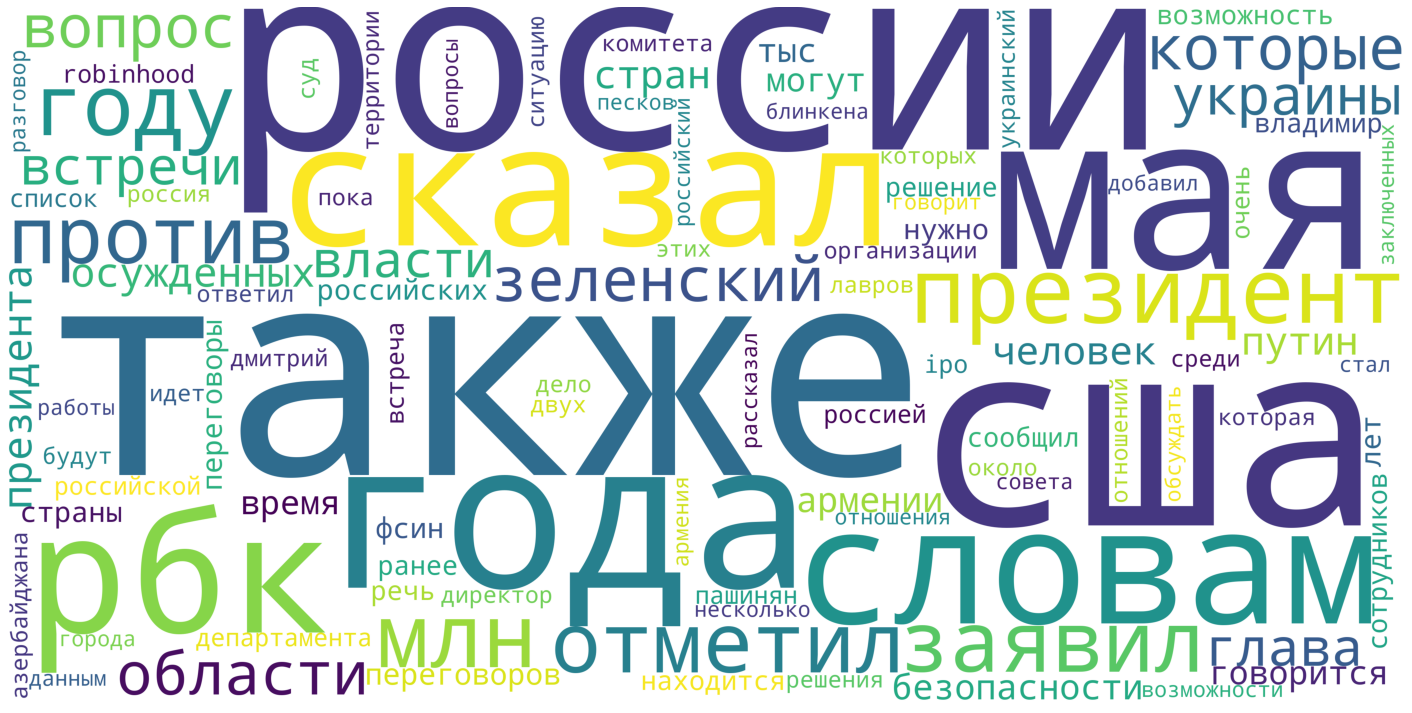

In [62]:
from wordcloud import WordCloud # pip install wordcloud
import matplotlib.pyplot as plt
%matplotlib inline

wc = WordCloud(width=4000, height=2000, max_words=100, 
               background_color='white', mask=None).generate_from_frequencies(freq_tokens)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

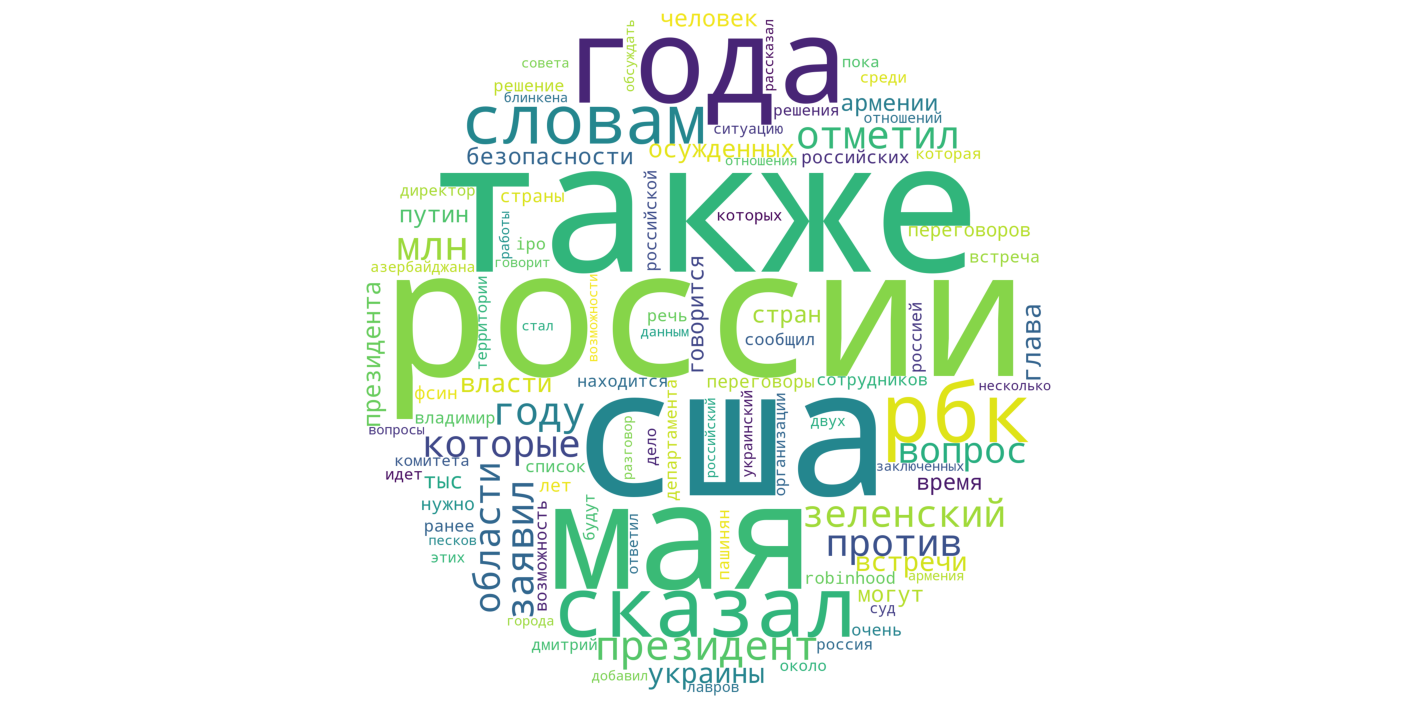

In [63]:
# можем использовать и (или создавать) различные маски

import numpy as np

def create_circular_mask(h, w, center=None, radius=None):

    if center is None: 
        center = (int(w/2), int(h/2))
    if radius is None: 
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0]) ** 2 + (Y-center[1]) **2)

    mask = dist_from_center <= radius
    mask = ~mask
    
    return mask

mask = create_circular_mask(2000, 4000)
mask = 255 * mask.astype(int)

wc = WordCloud(width=4000, height=2000, max_words=100, 
               background_color='white', mask=mask).generate_from_frequencies(freq_tokens)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

sk_corpus = [' '.join(token for token in sentence) for sentence in tokens_sentences]

vectorizer = CountVectorizer(vocabulary=list(freq_tokens.keys()))
X_bow = vectorizer.fit_transform(sk_corpus)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(vocabulary=list(freq_tokens.keys())) # tf-idf преобразование
X_tfidf = vectorizer.fit_transform(sk_corpus)

In [66]:
X_tfidf.toarray() # tf-idf матрица

array([[0.30159449, 0.28678799, 0.32246309, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.45128858, 0.45128858,
        0.45128858]])

In [67]:
import pandas as pd

idf = pd.DataFrame(vectorizer.get_feature_names(), columns=['token'])
idf['idf'] = vectorizer.idf_

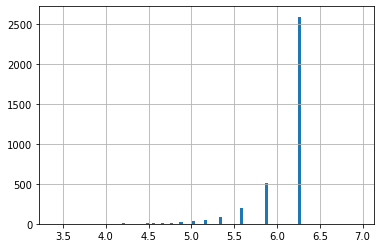

In [68]:
idf.idf.hist(bins=100)

In [69]:
idf_tokens = idf[(idf.idf > 4.5) & (idf.idf < 9)].token.tolist()
freq_tokens_idf = {key: freq_tokens[key] for key in idf_tokens}

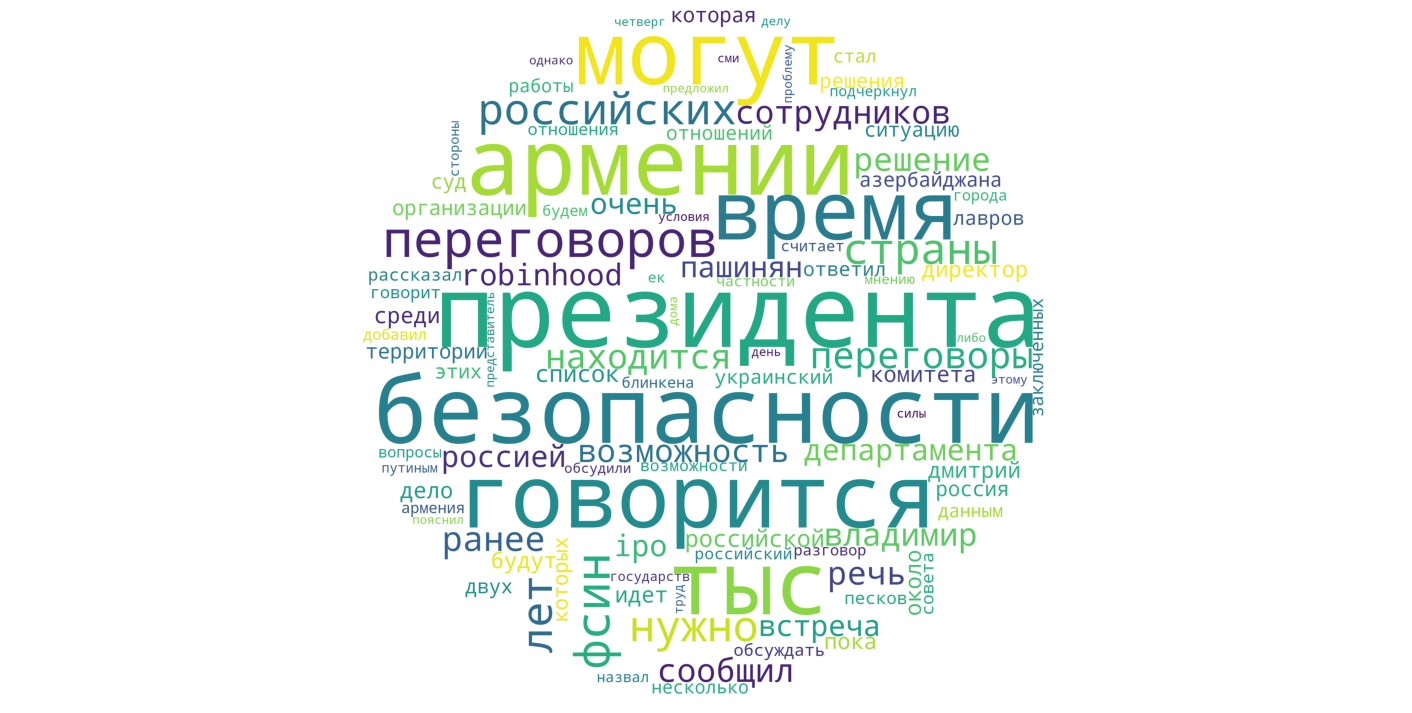

In [70]:
wc = WordCloud(width=4000, height=2000, max_words=100, 
               background_color='white', mask=mask).generate_from_frequencies(freq_tokens_idf)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()